In [1]:
%cd ..

d:\HUST\20232\ML\Project_OCR\HandwritingRecognition


# Check data

In [2]:
import os
import matplotlib.pyplot as plt

from utils import utils

c:\Users\tandat17z\anaconda3\envs\env_tandat17z\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
root = 'data/raw/vn_handwritten_images'
i = len(os.listdir(root + '/img'))
i

1836

address_1202.png


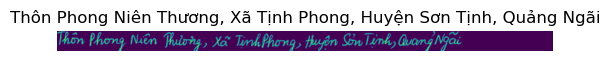

address_1241.png


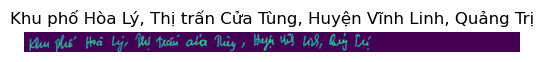

address_1260.png


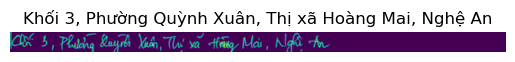

address_13.png


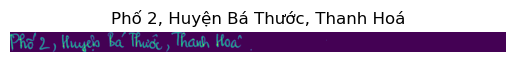

address_1320.png


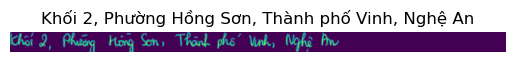

address_1375.png


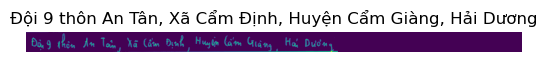

address_1450.png


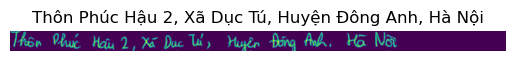

address_1524.png


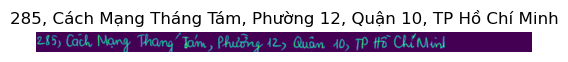

address_1592.png


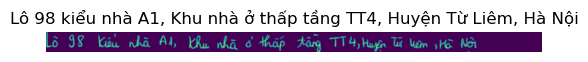

address_1700.png


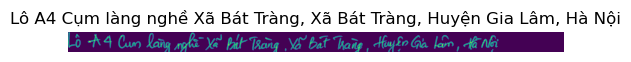

address_207.png


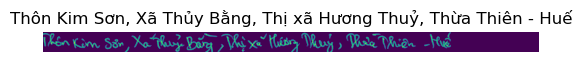

address_25.png


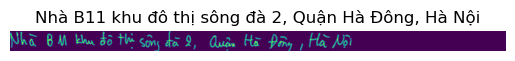

address_292.png


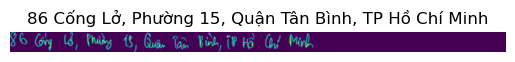

address_307.png


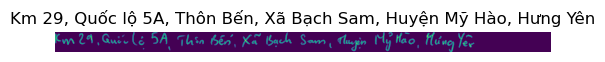

address_342.png


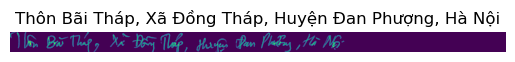

address_475.png


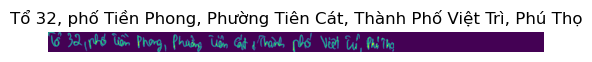

address_721.png


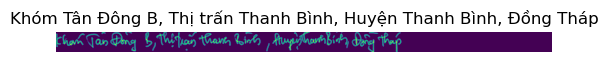

address_973.png


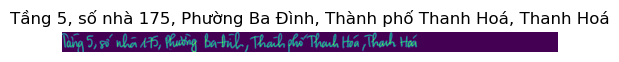

In [23]:
for path in os.listdir(root + '/img'):
    img = utils.img_loader(root + '/img/' + path, imgW = 800, threshold= 40)
    if img[0][0][0] != 0:
        print(path)
        labelpath = root + '/label/' + os.path.splitext(path)[0] + '.txt'
        with open(labelpath, 'r') as f:
            content = f.readline()
        plt.imshow(img[0])
        plt.axis('off')
        plt.title(content)
        plt.show()


In [30]:
from dataset_v2 import DatasetImg_v2

# Check dataset

In [2]:
from dataset_v2 import DatasetImg_v2

c:\Users\tandat17z\anaconda3\envs\env_tandat17z\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = DatasetImg_v2('data/data_v2/train/img', 'data/data_v2/train/label', scale = 1)

In [4]:
len(dataset)

5766

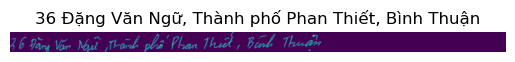

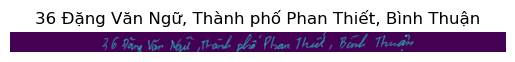

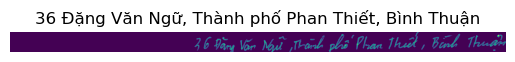

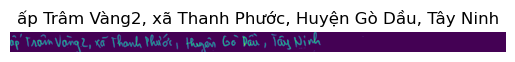

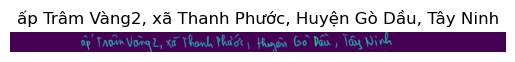

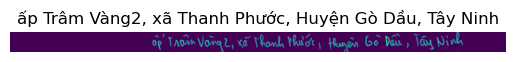

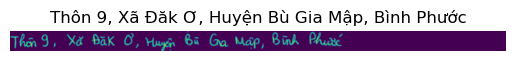

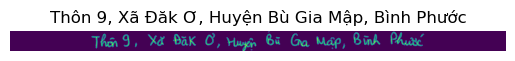

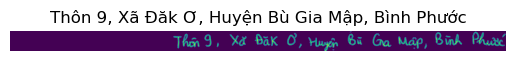

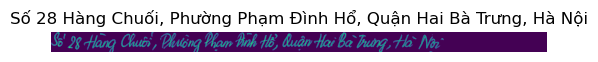

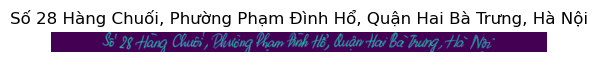

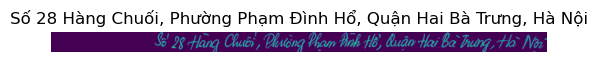

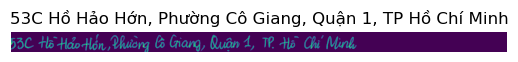

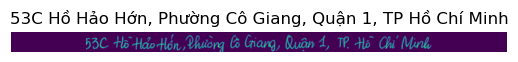

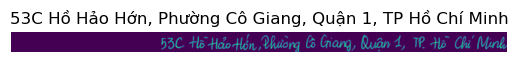

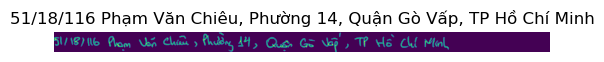

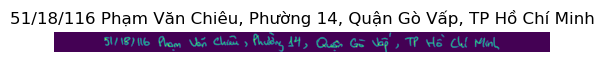

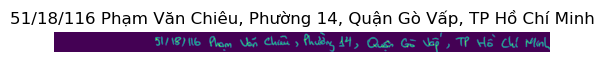

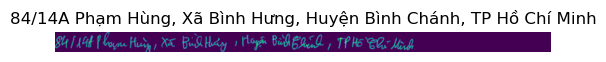

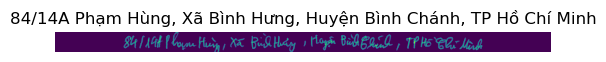

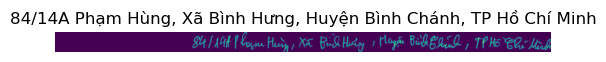

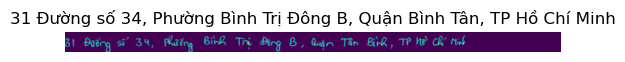

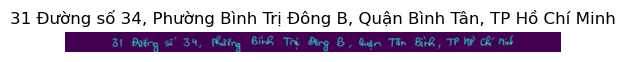

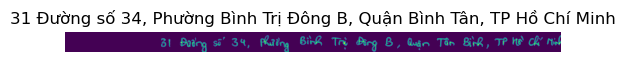

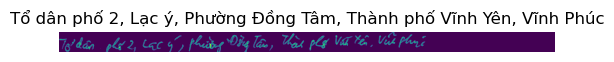

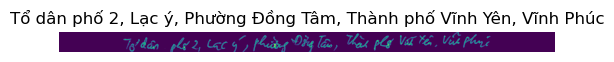

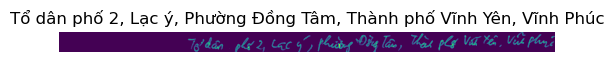

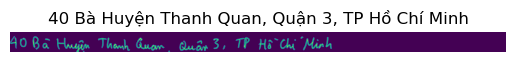

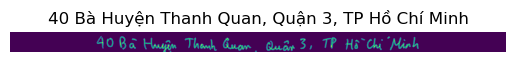

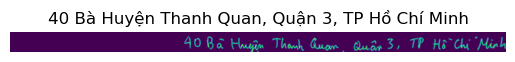

In [9]:
import matplotlib.pyplot as plt

for cnt in range(10):
    for i in [0 + cnt, 1922 +cnt, 1922*2 + cnt]:
        img, label = dataset[i]
        plt.imshow(img[0])
        plt.title(label)
        plt.axis('off')
        plt.show()

# Dataloader

In [10]:
import torch
train_dataloader = torch.utils.data.DataLoader(
                    dataset,
                    batch_size=64,
                    shuffle=True)

In [15]:
train_dataloader.sampler.num_samples /64

231.375

In [19]:
from tqdm import tqdm

t = tqdm(iter(train_dataloader), total=len(train_dataloader))
for batch_idx, (imgs, labels) in enumerate(t):
    if imgs.shape[-1] != 800: print(imgs, batch_idx)

100%|██████████| 232/232 [00:41<00:00,  5.65it/s]


In [18]:
imgs.shape

torch.Size([64, 1, 32, 800])